In [4]:
import json
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl

In [5]:
non_perturbed_deck = 'standard'
datasets = [
    'rotated'
] 
noise_pcts = [10,20,30,40,50,60,70,80,90,100]
FONT_SIZE=14
TICK_FONT_SIZE=14
mpl.rcParams['xtick.labelsize'] = TICK_FONT_SIZE
mpl.rcParams['ytick.labelsize'] = TICK_FONT_SIZE

In [6]:
def get_nsl_results(net_type, d):
    # need to build array of results for noise pcts
    acc = []
    
    # get standard
    np_0 = json.loads(open('../nsl/network_acc/'+net_type+'/standard.json').read())
    acc.append(np_0['noise_pct_0']['digit_accuracy'])
    
    # other noise pcts
    np_res = json.loads(open('../nsl/network_acc/'+net_type+'/'+d+'.json').read())
    for n in noise_pcts:
        acc.append(np_res['noise_pct_'+str(n)]['digit_accuracy'])
    return acc

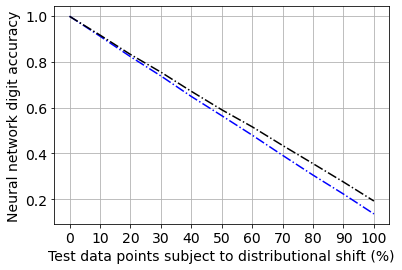

In [9]:
fig, ax = plt.subplots()

nps_x = [0]+noise_pcts
i=0
# NSL
nsl_acc = get_nsl_results('softmax', datasets[i])
ax.plot(nps_x, nsl_acc, label = "Softmax", color="b", linestyle='-.')

nsl_acc = get_nsl_results('edl_gen', datasets[i])
ax.plot(nps_x, nsl_acc, label = "EDL-GEN", color="k", linestyle='-.')

ax.set_xticks(nps_x)
#axes[i].set_yticks(np.arange(0.45,1.01,0.05))
ax.set_xlabel('Test data points subject to distributional shift (%)', fontsize=FONT_SIZE)
ax.set_ylabel('Neural network digit accuracy', fontsize=FONT_SIZE)
#     axes[i].set_title(datasets[i])
ax.grid(True)
legend = ax.legend(bbox_to_anchor=(1.05, 1.10), fontsize=9,ncol=3, borderaxespad=0, )

def export_legend(legend, filename="sudoku_4x4_network_acc_legend.pdf", expand=[-5,-5,5,5]):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox, format='pdf')


export_legend(legend)
ax.get_legend().remove()
plt.savefig('sudoku_4x4_network_accuracy_results.pdf', format='pdf', bbox_inches='tight')
plt.show()